In [1]:
# This jupyter notebook is to explore the raw and preprocessed data 
# the raw data was downloaded at https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import numpy as np
import pandas as pd
import pickle
import math
import re

In [2]:
!ls ./data 

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [3]:
# data_path
data_path = "./data"

In [21]:
# read in test data
with open(f"{data_path}/data_batch_1", "rb") as fin:
    data_batch_1_dict = pickle.load(fin, encoding="latin1")

In [22]:
data_batch_1_dict.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [23]:
data_batch_1_dict["batch_label"]

'training batch 1 of 5'

In [24]:
data_batch_1_dict["labels"][0], data_batch_1_dict["data"][0], data_batch_1_dict["filenames"][0]

(6,
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 'leptodactylus_pentadactylus_s_000004.png')

In [25]:
with open(f"{data_path}/batches.meta", "rb") as fin:
    label_index_map = pickle.load(fin, encoding="latin1")

In [26]:
# get the dictionary {index: name}
label_index_map = {idx : label for idx, label in enumerate(label_index_map["label_names"])}

In [27]:
label_index_map

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [18]:
from PIL import Image

In [13]:
# visualize image function
def visualize(img_batch, img_index):
    """
    Visualize given image in the batch
    Args:
        -img_batch: the batched images
        -img_index: which images you want to visualize
    """
    # get the label
    label = img_batch["labels"][img_index]
    print(f"{img_index}-th image in the batch: {label_index_map[label]}")
    
    # get the image
    img_raw = img_batch["data"][img_index]
    
    # split the channels based on illustration in CIFAR-10 webpage
    # add a new channel axis
    red_chl = img_raw[:1024].reshape(32,32)#[..., np.newaxis]
    green_chl = img_raw[1024:2048].reshape(32,32)#[..., np.newaxis]
    blue_chl = img_raw[2048:].reshape(32,32)#[..., np.newaxis]
    
    # stack the image by the order RGB 
    # https://stackoverflow.com/questions/46898979/how-to-check-the-channel-order-of-an-image
    pil_img = np.stack([red_chl, green_chl, blue_chl], axis=-1)
    #print(pil_img)
    #print(pil_img.shape)
    
    # show the image
    pil_img = Image.fromarray(pil_img)
    
    return pil_img

16-th image in the batch: truck


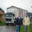

In [14]:
visualize(data_batch_1_dict, 16)

Take a look at how many images are in each batch

In [15]:
# take a look at two things (1) how many images are there in 5 total batches (2) what is their label distribution
def read_pkl(file_name):
    with open(file_name, "rb") as fin:
        pkl_file = pickle.load(fin, encoding="latin1")
    return pkl_file    

In [16]:
# get all labels from all data_batch_XX
all_labels = [read_pkl(f"./data/data_batch_{i}")["labels"] for i in range(1,6)]

In [17]:
# reduce list of list
from functools import reduce

all_labels = reduce(lambda a, b: a+b, all_labels)

In [18]:
len(all_labels)

50000

In [19]:
# check the label distribution
from collections import Counter

In [20]:
Counter(all_labels)

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [21]:
# so they are balanced dataset and the label index is from 0

In [22]:
### explore for the processed data

In [6]:
# read in the processed train_set, valid_set and test_set
with open("./processed_data/train_set.pkl", "rb") as fin:
    train_set = pickle.load(fin) 
with open("./processed_data/valid_set.pkl", "rb") as fin:
    valid_set = pickle.load(fin)
with open("./processed_data/test_set.pkl", "rb") as fin:
    test_set = pickle.load(fin)    

In [10]:
train_labels = [pair[1] for pair in train_set]
valid_labels = [pair[1] for pair in valid_set]

In [13]:
from collections import Counter
Counter(train_labels)

Counter({7: 3621,
         5: 3577,
         8: 3596,
         3: 3592,
         0: 3583,
         9: 3589,
         6: 3619,
         2: 3638,
         1: 3579,
         4: 3606})

In [14]:
Counter(valid_labels)

Counter({1: 407,
         3: 392,
         8: 401,
         7: 402,
         9: 389,
         2: 410,
         6: 401,
         4: 397,
         0: 403,
         5: 398})

In [15]:
len(train_set), len(valid_set), len(test_set)

(36000, 4000, 10000)

In [30]:
from matplotlib.pyplot import imshow

(<matplotlib.image.AxesImage at 0x2aaae5a31fd0>, 'cat')

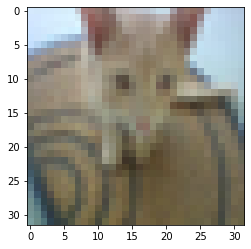

In [35]:
#visualize one of them
index = 7
imshow(Image.fromarray(train_set[index][0])), label_index_map[train_set[index][1]]